<a href="https://colab.research.google.com/github/MalakSwar/AI_Project/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Importing the dataset

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report


df = pd.read_csv('https://raw.githubusercontent.com/MalakSwar/AI_Project/refs/heads/main/Churn_Dataset.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#2) Data Cleaning

Tenure Analysis
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


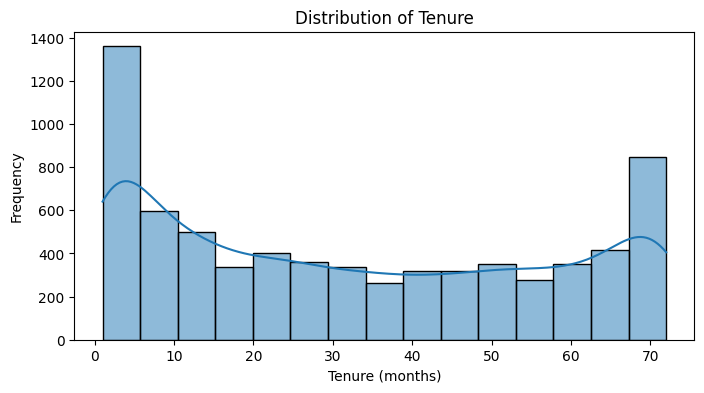

Contract Analysis
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64


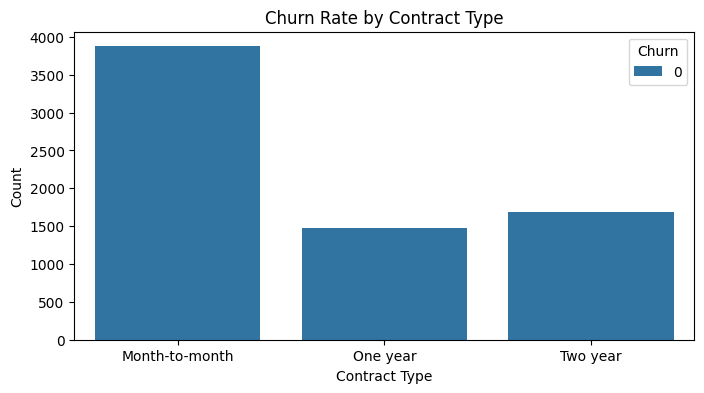

Payment Method Analysis
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64


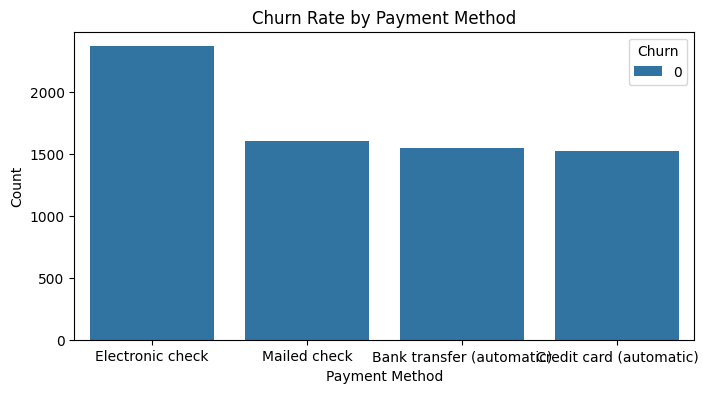

Monthly Charges Analysis
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64


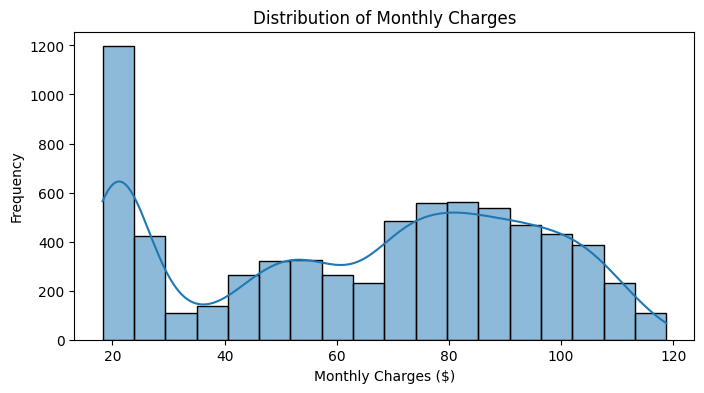

Correlation with Churn:
 tenure           NaN
MonthlyCharges   NaN
Churn            NaN
Name: Churn, dtype: float64


In [60]:
df = df[(df['TotalCharges'] != ' ') & (df['TotalCharges'] != '')]
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

def tenure_state(tenure):
    if tenure <= 12:
        return 'low'
    elif 12 < tenure <= 36:
        return 'medium'
    else:
        return 'high'

df['TenureGroup'] = df['tenure'].apply(tenure_state)



print("Tenure Analysis")
print(df['tenure'].describe())
plt.figure(figsize=(8, 4))
sns.histplot(df['tenure'], kde=True)
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency")
plt.show()

print("Contract Analysis")
print(df['Contract'].value_counts())
plt.figure(figsize=(8, 4))
sns.countplot(x='Contract', data=df, hue='Churn')
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

print("Payment Method Analysis")
print(df['PaymentMethod'].value_counts())
plt.figure(figsize=(8, 4))
sns.countplot(x='PaymentMethod', data=df, hue='Churn')
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

print("Monthly Charges Analysis")
print(df['MonthlyCharges'].describe())
plt.figure(figsize=(8, 4))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Frequency")
plt.show()

correlations = df[['tenure', 'MonthlyCharges', 'Churn']].corr()
print("Correlation with Churn:\n", correlations['Churn'])

Tenure Analysis
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


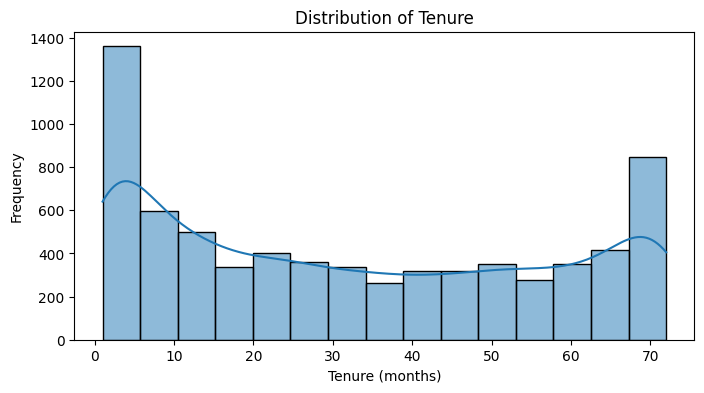

Contract Analysis
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64


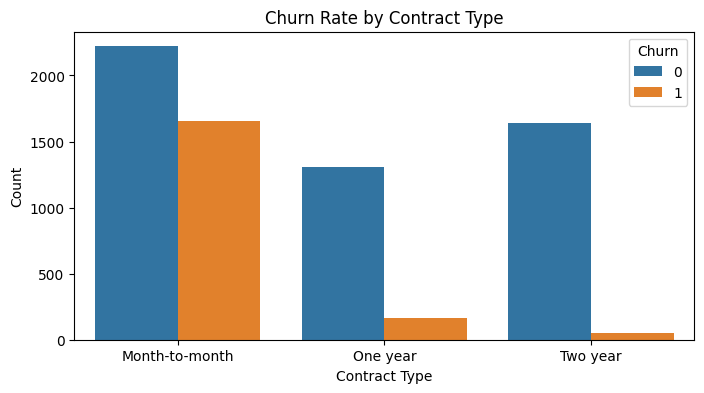

Payment Method Analysis
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64


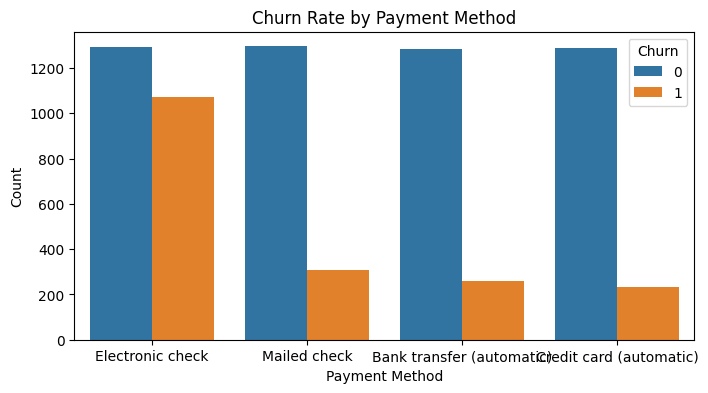

Monthly Charges Analysis
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64


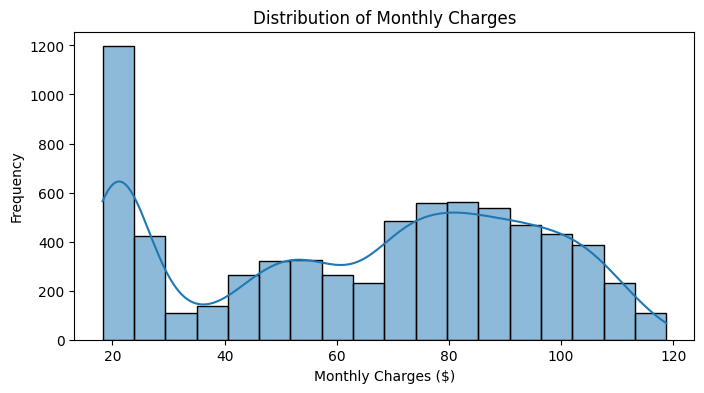

Correlation with Churn:
 tenure           -0.354049
MonthlyCharges    0.192858
Churn             1.000000
Name: Churn, dtype: float64
